# Import  Libraries



In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Read Dataset


In [46]:
data  = pd.read_csv(r'../input/50startups/50_Startups_dataset.csv')

data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [47]:
data.drop('Unnamed: 0',axis=1 ,inplace=True)
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04


# Quick Information about Dataset

In [48]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.100000,51283.240000,0.100000,14681.500000
25%,39936.470000,103730.975000,129300.232500,90139.002500
50%,73051.180000,122699.895000,212716.340000,107978.290000
75%,101602.900000,144842.280000,299469.185000,139766.077500
max,165349.300000,182645.660000,471784.200000,192261.930000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [50]:
data.duplicated().sum()

0

In [51]:
data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

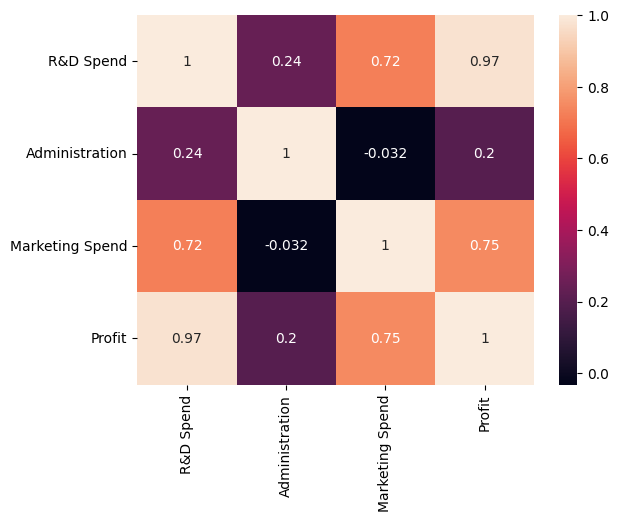

In [52]:
import seaborn as sns
sns.heatmap(data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr(),annot=True)

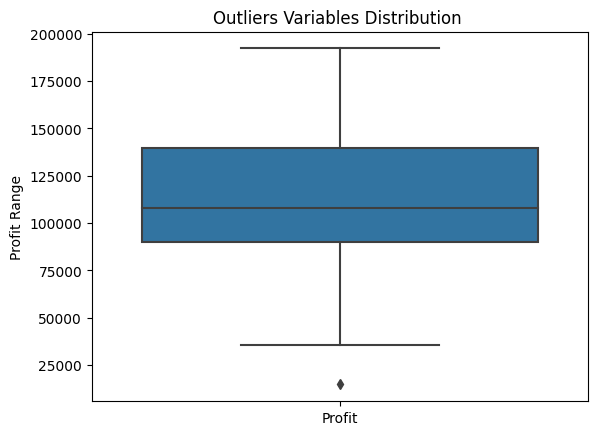

In [53]:
sns.boxplot(data[['Profit']])
plt.title('Outliers Variables Distribution ')
plt.ylabel('Profit Range')
plt.show()

In [54]:
# Pick up the outliers point(row)

q1 = data['Profit'].describe()['25%']
q3 = data['Profit'].describe()['75%']
IQR = q3-q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

outlayer = data[  (data['Profit'] > upper) | (data['Profit'] < lower)  ]
outlayer

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.1,116983.9,45173.16,California,14681.5


# Data Visualization

# Seperate X(input ),Y(output)  

In [55]:
X = data.iloc[ : , :-1]
Y = data.iloc[:,-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.30,136897.90,471784.20,New York
1,162597.80,151377.69,443898.63,California
2,153441.61,101145.65,407934.64,Florida
3,144372.51,118671.95,383199.72,New York
4,142107.44,91391.87,366168.52,Florida


# Data Preprocessing

In [56]:
# incode categorical data 
X = pd.get_dummies(X)
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.30,136897.90,471784.20,False,False,True
1,162597.80,151377.69,443898.63,True,False,False
2,153441.61,101145.65,407934.64,False,True,False
3,144372.51,118671.95,383199.72,False,False,True
4,142107.44,91391.87,366168.52,False,True,False
5,131877.00,99814.81,362861.46,False,False,True
6,134615.56,147198.97,127716.92,True,False,False
7,130298.23,145530.16,323876.78,False,True,False
8,120542.62,148719.05,311613.39,False,False,True
9,123334.98,108679.27,304981.72,True,False,False


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['R&D Spend']] = scaler.fit_transform(X[['R&D Spend']])
X[['Administration']] = scaler.fit_transform(X[['Administration']])
X[['Marketing Spend']] = scaler.fit_transform(X[['Marketing Spend']])

X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,2.016411,0.560753,2.153943,False,False,True
1,1.955860,1.082807,1.923600,True,False,False
2,1.754364,-0.728257,1.626528,False,True,False
3,1.554784,-0.096365,1.422210,False,False,True
4,1.504937,-1.079919,1.281528,False,True,False
5,1.279800,-0.776239,1.254210,False,False,True
6,1.340066,0.932147,-0.688150,True,False,False
7,1.245057,0.871980,0.932186,False,True,False
8,1.030369,0.986952,0.830887,False,False,True
9,1.091819,-0.456640,0.776107,True,False,False


# Splitting the dataset

In [58]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(X,Y, test_size=0.2,random_state=30)


# Model Building

In [59]:
# model (1) Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x_train , y_train)

print('Score Train Lin_Reg :',lin_reg.score(x_train,y_train))
print('Score Test Lin_Reg :',lin_reg.score(x_test,y_test))

Score Train Lin_Reg : 0.953132040714949
Score Test Lin_Reg : 0.8715447367658172


In [60]:
# model (2) Random Forest Regressor

from sklearn.ensemble  import RandomForestRegressor

random_forst_model = RandomForestRegressor()
random_forst_model.fit(x_train , y_train)
print('Score Train random_forst_model :',random_forst_model.score(x_train,y_train))
print('Score Test random_forst_model :',random_forst_model.score(x_test,y_test))

Score Train random_forst_model : 0.9901382230512482
Score Test random_forst_model : 0.9267553545573817


# Prediction

In [61]:
# linear model
y_pred_of_lin_model = lin_reg.predict(x_test)

# random_forst_model
y_pred_of_random_forst_model = random_forst_model.predict(x_test)

df_predicted = pd.DataFrame([y_pred_of_lin_model,y_pred_of_random_forst_model])
df_predicted= df_predicted.T
df_predicted.columns =['Linear Regression' ,'Random Forst']
df_predicted

,Linear Regression,Random Forst
0,74204.348961,82088.0791
1,116567.042054,109592.2317
2,96481.852069,94729.0355
3,57440.771228,68239.2921
4,134531.304352,139887.4449
5,98963.252665,102902.4682
6,97302.639436,100346.8979
7,100426.609773,102969.5342
8,87823.758770,92693.3307
9,111618.864020,133800.2568


# Evaluate Model

In [62]:
from sklearn.metrics import mean_absolute_error

print("MAE of Linear Regression",mean_absolute_error( lin_reg.predict(x_test),y_test))

MAE of Linear Regression 5994.698554529457


In [63]:
print('random_forst_model = ',mean_absolute_error( random_forst_model.predict(x_test),y_test))


random_forst_model =  4856.772290000008
